In [74]:
%pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from matplotlib import pyplot
from keras.models import model_from_json


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [76]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [77]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', padding='valid'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [78]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [79]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2370 - accuracy: 0.9291 - val_loss: 0.0838 - val_accuracy: 0.9766
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0864 - accuracy: 0.9733 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0588 - accuracy: 0.9814 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0228 - val_accuracy: 0.9924


In [80]:
lenet_5_model.evaluate(test_x, test_y)

 39/313 [==>...........................] - ETA: 0s - loss: 0.0583 - accuracy: 0.9816

313/313 [==============================] - 2s 5ms/step - loss: 0.0445 - accuracy: 0.9846


[0.044548988342285156, 0.9846000075340271]

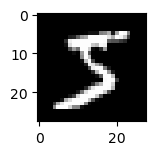

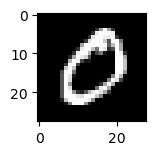

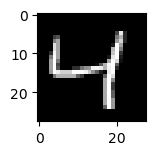

In [81]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()



In [82]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets


INFO:tensorflow:Assets written to: lenet_5_model/assets


['saved_model.pb', 'fingerprint.pb', 'keras_metadata.pb', 'variables', 'assets']


In [83]:
lenet_5_model.save("my.h5")

/users/nicolass80/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
lenet_5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_8 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [85]:
json_model = lenet_5_model.to_json()

In [86]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [87]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [88]:


first_layer_weights = lenet_5_model.layers[0].get_weights()[0]
print(first_layer_weights.shape)

second_layer_weights = lenet_5_model.layers[2].get_weights()[0]
print(second_layer_weights.shape)

third_layer_weights = lenet_5_model.layers[5].get_weights()[0]
print(third_layer_weights.shape)

fourth_layer_weights = lenet_5_model.layers[6].get_weights()[0]
print(fourth_layer_weights.shape)

fifth_layer_weights = lenet_5_model.layers[7].get_weights()[0]
print(fifth_layer_weights.shape)



for i in third_layer_weights:
    print(i)



(5, 5, 1, 6)
(5, 5, 6, 16)
(256, 120)
(120, 84)
(84, 10)
[-0.16385943 -0.17067514 -0.01816657 -0.05395625  0.01617797  0.08398969
  0.05157521 -0.15173349 -0.18316883  0.08336387  0.24181825  0.06917233
  0.09283062  0.10360916  0.2654216   0.13827793  0.14080219 -0.06064408
 -0.12595469 -0.13794948 -0.10994011 -0.00343543  0.02301057 -0.04285668
 -0.1470943   0.11298784 -0.0985022  -0.12199919  0.02632249 -0.2343287
  0.0414445   0.07047983 -0.09210172 -0.11039536  0.16792893 -0.01012358
  0.00981811 -0.08069196 -0.00036086 -0.1245041  -0.11860486  0.07992738
  0.14378238  0.07994191 -0.07015032 -0.02392735  0.04409961 -0.0563039
  0.05128378  0.00803799 -0.15509991 -0.02970325 -0.14978962 -0.1470312
  0.00466596 -0.0333813  -0.07454297  0.1798903  -0.07730945  0.10760648
  0.08828193  0.03669398 -0.09481429  0.04678221 -0.0122195  -0.16415939
  0.06526373 -0.02507166  0.18294966 -0.15320268  0.16140959  0.10222898
  0.10903194 -0.00085023 -0.15211914  0.00797218 -0.19462556 -0.028482

In [97]:
filters_list_C1 = np.array([first_layer_weights[:, :, :, i] for i in range(first_layer_weights.shape[-1])]).flatten()
np.savetxt("C1.txt", filters_list_C1, delimiter=",")

filters_list_C3 = np.array([second_layer_weights[:, :, :, i] for i in range(second_layer_weights.shape[-1])]).flatten()
np.savetxt("C3.txt", filters_list_C3, delimiter=",")


third_layer_weights_flattened = third_layer_weights.flatten()
np.savetxt("C5.txt", third_layer_weights_flattened, delimiter=",")

fourth_layer_weights_flattened = fourth_layer_weights.flatten()
np.savetxt("C6.txt", fourth_layer_weights_flattened, delimiter=",")

fifth_layer_weights_flattened = fifth_layer_weights.flatten()
np.savetxt("C7.txt", fifth_layer_weights_flattened, delimiter=",")